$n$ is the number of bidders.

$\alpha$ is the probability with which each bidder is uninformed.

$F(\cdot)$ is the distribution of values on $[0,1]$ for both informed and uninformed buyers.

$\phi(v)=v-\frac{(1-F(v))}{f(v)}$ is the virtual valuation function, assumed to be strictly increasing.

$\pi(x)\equiv (1-F(x))x$ is the revenue function - the expected revenue from making a take it or leave if offer $x$ to a buyer.

In [2]:

var('n','alpha','x','v')
F= function('F')
phi = function('phi')
f = function('f')
pi = function('pi')
#(x)= x^2
f = diff(F(x),x)


In [3]:
phi(x) = x-(1-F(x))/f(x)
phi

x |--> x + (F(x) - 1)/diff(F(x), x)

In [4]:
#plot(phi,.2,1)

In [5]:
#find_root((phi(x)==0),.2,1)

In [6]:
pi(x) = (1-F(x))*x
pi

x |--> -x*(F(x) - 1)

This section describes the variables in the solution to the maximization problem.

* $v_0$ and $v_1$ are lower and upper bounds resepectively on an interval of informed buyer types who are treated exactly the same way that uninformed bidders are.
* $r$ is the reserve price in an auction that occurs when all bidders are informed and none of them have values above $v_0$
* $t$ is the expected price offer to uninformed buyers and to informed buyers whose values are in the interval $[v_0,v_1]$ conditional on receiving an offer. 

The next step is to write down the trading probability of buyer as a function of his or her type.

To do this we need a new function \
$$
\chi(v_0,v_1) = \frac{((1-\alpha)F(v_{1})+\alpha)^{n}-((1-\alpha)F(v_{0}))^{n}}{n((1-\alpha)(F(v_{1})-F(v_{0}))+\alpha)}
$$
The description is in the paper.

In [7]:
function('chi')
chi(v_0,v_1,n,alpha)=(((1-alpha)*F(v_1)+alpha)^n -((1-alpha)*F(v_0))^n)/(n*(((1-alpha)*(F(v_1)-F(v_0)))+alpha))
show(chi)

(v_0, v_1, n, alpha) |--> -((-(alpha - 1)*F(v_0))^n - (-(alpha - 1)*F(v_1) + alpha)^n)/(((alpha - 1)*(F(v_0) - F(v_1)) + alpha)*n)

In [8]:
chi

(v_0, v_1, n, alpha) |--> -((-(alpha - 1)*F(v_0))^n - (-(alpha - 1)*F(v_1) + alpha)^n)/(((alpha - 1)*(F(v_0) - F(v_1)) + alpha)*n)

The second function we'll need is 
$$
\sum_{m=0}^{n-1}B(m;n-1,\alpha)F^{n-1-m}(w)
$$
which describes the probability with which very high value buyers receive offers

In [9]:
h(n,k,alpha,x) = (binomial(n,k)*(alpha^k)*(1-alpha)^(n-k))*F(x)^(n-k)
#h(3,2,.5)
#n,alpha = 3,.5
show(latex(h))

\left( n, k, \alpha, x \right) \ {\mapsto} \ \alpha^{k} {\left(-\alpha + 1\right)}^{-k + n} F\left(x\right)^{-k + n} {n \choose k}

In [10]:
prob = sum(h(n,k,alpha,x),k,0,n)
#plot(prob,(x,.7,1))
show(latex(prob))

{\left(-{\left(\alpha - 1\right)} F\left(x\right) + \alpha\right)}^{n}

The next step is to describe the probability of trade function for an informed bidder using $\chi$.

It is given by
\begin{equation}
Q^{\epsilon}\left(w\right)=\label{aggregate-Q}
\end{equation}

$$
\left\{ \begin{array}{ccc}
0 & \text{if} & w<r\\
(1-\alpha)^{n-1}F^{n-1}(w) & \text{if} & w\in[r,v_{-})\\
\chi(v_{-},v_{+}) & \text{if} & w\in[v_{-},v_{+}]\\
\sum_{m=0}^{n-1}B(m;n-1,\alpha)F^{n-1-m}(w) & \text{if} & w>v_{+},
\end{array}\right.
$$

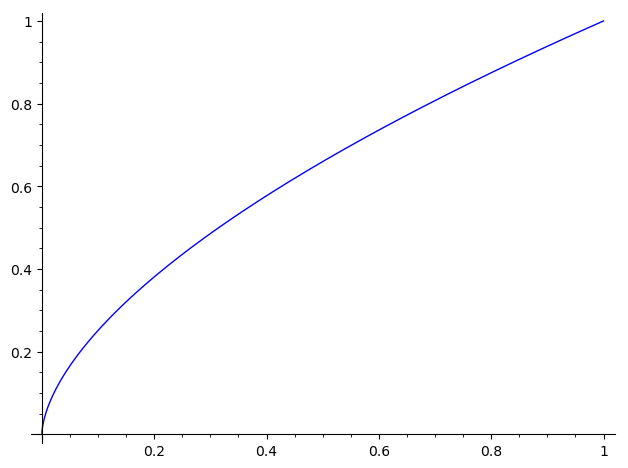

In [11]:
#assignments -needed by piecewise for definition
#0.52699   0.60428   0.64924   0.66497
n,alpha,z = 5,.8,20
#mike solution r,t,v_0,v_1 =0.53489,   0.57429,   0.66325,   0.67115
# li solution r -> 0.534536, t -> 0.575657, u -> 0.667563, v -> 0.675814}
#mike F=.6x,n=2 0.37725   0.47773   0.47785   0.55816
r,t,v_0,v_1 = 0.37725,   0.47773,   0.47785,   0.55816

#r,t,v_0,v_1 =0.52699,   0.60428,   0.64924,   0.66497
F(x)= x^(.6)
#F(x)= ((1/2)*(sqrt(z*x^4 + 1) - 1)/x^2)/((1/2)*(sqrt(z*1^4 + 1) - 1))
#F(v) = (erf(-pi+v*2*pi)+1)/(erf(pi)+1)
#r,v_0,v_1 = .388505,.481644,.538108
plot(F,0,1)

The next bit is an alternative approach that might be more integration friendly.

In [12]:
#alpha=.5
#n=3
#((v_0,v_1),(((1-alpha)*F(v_1)+alpha)^n -((1-alpha)*F(v_0))^n)/n*(((1-alpha)*(F(v_1)-F(v_0)))+alpha))
function('L')
L = piecewise([((0,r),0), ((r,v_0), ((1-alpha)^(n-1))*F(x)^(n-1)), 
               ((v_0,v_1),(((1-alpha)*F(v_1)+alpha)^n -((1-alpha)*F(v_0))^n)/(n*(((1-alpha)*(F(v_1)-F(v_0)))+alpha))), 
               ((v_1,1), (alpha+(1-alpha)*F(x))^(n-1)) ])
L

piecewise(x|-->0 on (0, 0.377250000000000), x|-->0.00160000000000000*x^2.40000000000000 on (0.377250000000000, 0.477850000000000), x|-->0.181555737395078 on (0.477850000000000, 0.558160000000000), x|-->(0.200000000000000*x^0.600000000000000 + 0.800000000000000)^4 on (0.558160000000000, 1); x)

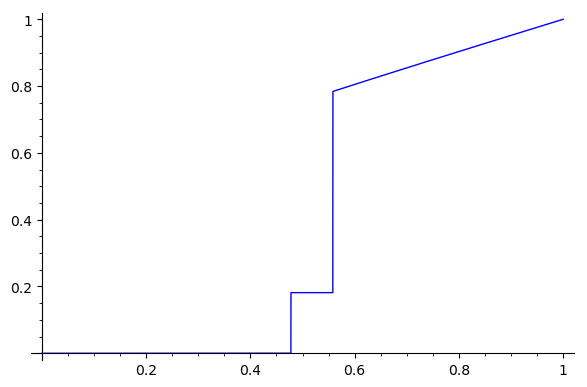

In [13]:
plot(L,(0,1))

In [14]:
var('A','P1','P2')
#(((1-alpha)*F(v_1)+alpha)^n -((1-alpha)*F(v_0))^n)/n*(((1-alpha)*(F(v_1)-F(v_0)))+alpha)
A= (((1-alpha)*F(v_1)+alpha)^n -((1-alpha)*F(v_0))^n)/(n*(((1-alpha)*(F(v_1)-F(v_0)))+alpha))
#
A
P1=plot(lambda x:-A*t +A*x,(.35,1))


In [15]:
var('y')
P2=plot(lambda y: L.integral(x,.01,y,true),(.35,1))

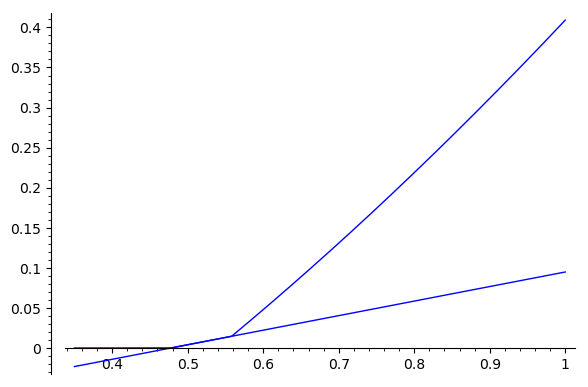

In [16]:
P1+P2

Finally, we compute the probability with which the good is offered at the fixed price $t$.  This is
$$
(1-\alpha)^n(F^n(v_1)-F^n(v_0))+(1-\alpha)^nF^n(v_1)((1+\frac{\alpha}{(1-\alpha F(v_+)})^n-1)
$$

In [17]:
((1-alpha)^n)*((F(v_1))^n-(F(v_0)^n)) + ((1-alpha)^n)*((F(v_1))^n)  *((1+alpha/((1-alpha)*F(v_1)))^n - 1)

0.737610790160378

In [20]:
((1+alpha/((1-alpha)*F(v_1))) - 1)

5.67550832890070